In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/monthly-milk-production-pounds.csv", parse_dates = ["Month"])

df.head(2)


,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0


In [ ]:
df.dropna(inplace = True)

In [ ]:
df["Month"] = pd.to_datetime(df["Month"])

In [ ]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [ ]:
df.index = df["Month"]

In [ ]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
Month,,
1962-01-01,1962-01-01,589.0
1962-02-01,1962-02-01,561.0
1962-03-01,1962-03-01,640.0
1962-04-01,1962-04-01,656.0
1962-05-01,1962-05-01,727.0


In [ ]:
df.drop(columns = ["Month"],inplace = True)

In [ ]:
df.head()

,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [ ]:
df.columns=["Production"]
df.head()

,Production
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


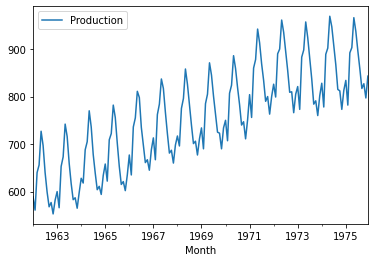

In [ ]:
df.plot()

In [ ]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [ ]:
df

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

In [ ]:
train_val = int(len(df)*0.9)

In [ ]:
X_train, X_test = df[:train_val,:],df[train_val:,:]

In [ ]:
def make_dataset(data, window=1):
  X,y=[],[]  for i in range(len(data)-window-1):
    X.append(df[i:i+window,:])
    y.append(df[i+window,:])
  return np.array(X),np.array(y)

X_train, y_train = make_dataset(X_train,3)
X_test, y_test = make_dataset(X_test,3)



In [ ]:
#LSTM
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(60,return_sequences= True, input_shape=(3,1)),
    tf.keras.layers.LSTM(60),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error",optimizer="adam")
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=1,verbose=1)

Epoch 1/100
139/139 [==============================] - 5s 11ms/step - loss: 541457.6250 - val_loss: 417706.4375
Epoch 2/100
139/139 [==============================] - 1s 5ms/step - loss: 520779.6875 - val_loss: 405010.8125
Epoch 3/100
139/139 [==============================] - 1s 5ms/step - loss: 507477.0000 - val_loss: 393567.8125
Epoch 4/100
139/139 [==============================] - 1s 5ms/step - loss: 494971.0625 - val_loss: 382652.1250
Epoch 5/100
139/139 [==============================] - 1s 5ms/step - loss: 482921.7188 - val_loss: 372082.0312
Epoch 6/100
139/139 [==============================] - 1s 5ms/step - loss: 471258.7188 - val_loss: 361867.6562
Epoch 7/100
139/139 [==============================] - 1s 6ms/step - loss: 459926.2812 - val_loss: 351917.6250
Epoch 8/100
139/139 [==============================] - 1s 7ms/step - loss: 448868.3438 - val_loss: 342208.6875
Epoch 9/100
139/139 [==============================] - 1s 6ms/step - loss: 438061.6250 - val_loss: 332746.5000


In [ ]:
pred = scaler.inverse_transform(model.predict(X_test))
y_test = scaler.inverse_transform(y_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred,y_test)

2033.0826401151717

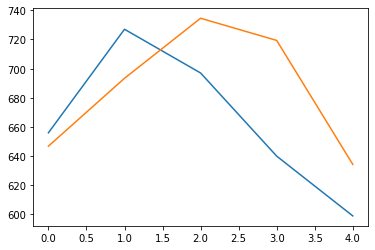

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test,label="Original value")
plt.plot(pred,label="Predicted Value")

In [ ]:
pred_train = scaler.inverse_transform(model.predict(X_train))
y_train = scaler.inverse_transform(y_train)

In [ ]:
mean_squared_error(pred_train,y_train)

1702.6291057636304

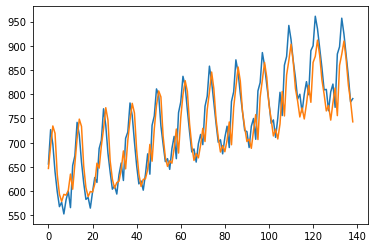

In [ ]:
plt.plot(y_train,label="Original Value")
plt.plot(pred_train,label="Predicted Value")

In [ ]:
y_train, y_test = scaler.transform(y_train),scaler.transform(y_test)

In [ ]:

#GRU
model = tf.keras.models.Sequential([
    tf.keras.layers.GRU(60,return_sequences=True,input_shape=(3,1)),
    tf.keras.layers.GRU(60),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(X_train,y_train,validation_batch_size=(X_test,y_test),epochs=100,batch_size=1,verbose=1)

Epoch 1/100
147/147 [==============================] - 3s 4ms/step - loss: 0.0398
Epoch 2/100
147/147 [==============================] - 1s 4ms/step - loss: 0.0203
Epoch 3/100
147/147 [==============================] - 1s 4ms/step - loss: 0.0186
Epoch 4/100
147/147 [==============================] - 1s 4ms/step - loss: 0.0142
Epoch 5/100
147/147 [==============================] - 1s 4ms/step - loss: 0.0131
Epoch 6/100
147/147 [==============================] - 1s 4ms/step - loss: 0.0147
Epoch 7/100
147/147 [==============================] - 1s 4ms/step - loss: 0.0133
Epoch 8/100
147/147 [==============================] - 1s 4ms/step - loss: 0.0126
Epoch 9/100
147/147 [==============================] - 1s 4ms/step - loss: 0.0117
Epoch 10/100
147/147 [==============================] - 1s 4ms/step - loss: 0.0132
Epoch 11/100
147/147 [==============================] - 1s 5ms/step - loss: 0.0125
Epoch 12/100
147/147 [==============================] - 1s 7ms/step - loss: 0.0121
Epoch 13/100


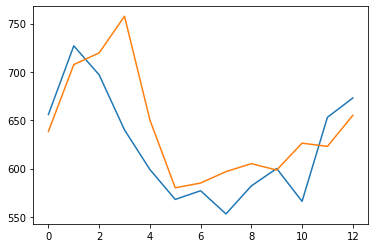

In [ ]:
pred = scaler.inverse_transform(model.predict(X_test))
y_test = scaler.inverse_transform(y_test)

plt.plot(y_test,label="original value")
plt.plot(pred,label="predicted value")

In [ ]:
mean_squared_error(pred,y_test)

1939.2081069596684

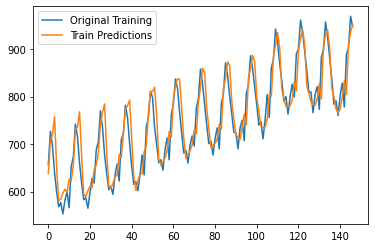

In [ ]:
pred_train, ytrain = scaler.inverse_transform(model.predict(X_train)), scaler.inverse_transform(y_train)

plt.plot(ytrain, label='Original Training')
plt.plot(pred_train, label='Train Predictions')
plt.legend()

In [ ]:
mean_squared_error(pred_train,y_train)

573954.7606823571